# IBM HR Analytics in Python
### Group Project (Green Team)

### Business Problem

Employee attrition refers to the loss of employees through a natural process, such as retirement, resignation, elimination of a position, personal health, or other similar reasons. Oftentimes, due to the voluntary nature of the termination, the employer does not seek to fill the role immediately. Employee attrition analytics is specifically focused on identifying why employees voluntarily leave, what might have prevented them from leaving, and how we can use data to reduce attrition risk.

### Goal
By analyzing the avaiable data, our team intends to identify significant factors that lead to attrition. We believe this information will be crucial to the development of effective strategies that are intended to reduce turnover rates for top talent and ensure a high return on investment for the organization.

### Summary of Dataset
- Kaggle Dataset: "IBM HR Analytics Employee Attrition & Performance"
- instances: 1470
- features/attributes: 35
- Target Variable: "Attrition"
    - Attrition rate: about 16%
- Missing Values: N/A
- Duplicates: N/A
- Outliers: Very few

## Importing required libraries

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from dmba import liftChart, gainsChart
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, auc, roc_curve, roc_auc_score, classification_report
%matplotlib inline

## Loading the dataset

In [19]:
df = pd.read_csv("/Users/hojin/Desktop/BaruchClass/2021Spring/CIS9660-DataMining/GroupProject/attrition.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [20]:
df.shape

(1470, 35)

In [21]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [23]:
# target value
df[["Attrition"]]

Attrition
0          Yes
1           No
2          Yes
3           No
4           No
...        ...
1465        No
1466        No
1467        No
1468        No
1469        No

[1470 rows x 1 columns]

## Data Profilling before preprocessing data
The process of examining the data available from an existing information source and collecting statistics or informative summaries about that ...

In [24]:
import pandas_profiling

In [25]:
# pandas_profiling.ProfileReport(df)

## Data Preprocessing
A data mining technique that involves transforming raw data into an understandable format. 

- We are going to create a new column named "Status" to explain the target variable, "Attrition"
- Correcting our target variable

In [26]:
df["Status"] = df["Attrition"].map({"Yes":"Left", "No":"Employed"})
df["Attrition"] = df["Attrition"].map({"Yes":1, "No":0})

In [27]:
df[["Attrition", "Status"]].head()

Attrition    Status
0          1      Left
1          0  Employed
2          1      Left
3          0  Employed
4          0  Employed

In [28]:
# # Creating categories for Education
df["Education"]=df["Education"].astype("category")
edu_categories = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master' ,5: 'Doctor'}
df.Education.cat.rename_categories(edu_categories, inplace=True)
df["Education"].cat.categories

# # Creating categories for EnvironmentSatisfaction
# df["EnvironmentSatisfaction"]=df["EnvironmentSatisfaction"].astype("category")
# env_categories = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
# df.EnvironmentSatisfaction.cat.rename_categories(env_categories, inplace=True)
# df["EnvironmentSatisfaction"].cat.categories

# # Creating categories for JobInvolvement
# df["JobInvolvement"]=df["JobInvolvement"].astype("category")
# inv_categories = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
# df.JobInvolvement.cat.rename_categories(inv_categories, inplace=True)
# df["JobInvolvement"].cat.categories

# # Creating categories for JobSatisfaction
# df["JobSatisfaction"]=df["JobSatisfaction"].astype("category")
# sat_categories = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
# df.JobSatisfaction.cat.rename_categories(sat_categories, inplace=True)
# df["JobSatisfaction"].cat.categories

# # Creating categories for PerformanceRating
# df["PerformanceRating"]=df["PerformanceRating"].astype("category")
# per_categories = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
# df.PerformanceRating.cat.rename_categories(per_categories, inplace=True)
# df["PerformanceRating"].cat.categories

# # Creating categories for RelationshipSatisfaction
# df["RelationshipSatisfaction"]=df["RelationshipSatisfaction"].astype("category")
# rel_categories = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
# df.RelationshipSatisfaction.cat.rename_categories(rel_categories, inplace=True)
# df["RelationshipSatisfaction"].cat.categories

# # Creating categories for WorkLifeBalance
# df["WorkLifeBalance"]=df["WorkLifeBalance"].astype("category")
# work_categories = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
# df.WorkLifeBalance.cat.rename_categories(work_categories, inplace=True)
# df["WorkLifeBalance"].cat.categories

Index(['Below College', 'College', 'Bachelor', 'Master', 'Doctor'], dtype='object')

## EDA (Exploratory Data Analysis)

"Attrition" is the target variable in our dataset.<br> Attrition=1 means employee left the organization.<br> As we can see below, 237 employees left the organization out of the 1470 employees.

In [29]:
# Frequency of the target variable
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [30]:
df["Attrition"].value_counts(normalize=True)*100

import plotly.graph_objects as go
fig = go.Figure()
labels = ["No", "Yes"]
fig.add_trace(go.Pie(labels=labels, values=df["Attrition"].value_counts(normalize=True)*100))
fig.update_layout(autosize=False, width=400, height=350)
fig.show()
%matplotlib inline

As we can see the plot as above, the attrition rate is about 16% for the organization<br>
**Observation: The above plot demonstrates that "Attrition" feature(target variable) is imbalanced, with significantly more observations having a status of "Employeed"**

## 1) Missing values

In [31]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## 2) Duplicates

In [32]:
df[df.duplicated()].value_counts().sum()

0

There are no missing values and no duplicates in the dataset.

## 3) Checking unique variables on all columns
### Dropping insignificant variables

In [33]:
for col in df.columns:
    if df[col].nunique() == 1: # number of unique elements 
        print(col)

EmployeeCount
Over18
StandardHours


In [34]:
df[["EmployeeCount", "Over18", "StandardHours"]].head()

EmployeeCount Over18  StandardHours
0              1      Y             80
1              1      Y             80
2              1      Y             80
3              1      Y             80
4              1      Y             80

"Employeecount", "Over18", "StandardHours" are not unique through all rows - They don't contribute into our analysis so we are going to drop these columns

In [35]:
df.drop(["EmployeeCount", "Over18", "StandardHours"], axis="columns", inplace=True)

## 4) Relationship between variables
### Correlation matrix and heatmap

In [36]:
plt.figure(figsize=(15,12))
sns.set(font_scale=1.5)
plt.title("Correlation of Attributes", y = 1.05, size = 19)
sns.heatmap(df.corr(), linewidth = 0.1, cmap="inferno")

<AxesSubplot:title={'center':'Correlation of Attributes'}>

**Observations: There is high correlation between**
- JobLevel and MonthlyIncome
- JobLevel and TotalWorkingYears
- MonthlyIncome and TotalWorkingYears
- Age and TotalWorkingYears

In [37]:
# Attrition vs monthly income
plt.figure(figsize=(6,5))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title("Attrition vs Monthly Income", fontsize=15)
plt.xlabel("Attrition", fontsize=13)
plt.ylabel("Monthly Income", fontsize=13)
plt.show()

**Observation: the median monthly income was lower for employees who left.**

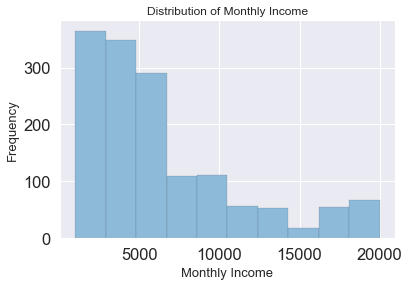

Department   min    max         mean
0         Human Resources  1555  19717  6654.507937
1  Research & Development  1009  19999  6281.252862
2                   Sales  1052  19847  6959.172646

In [38]:
# Distribution of Monthly Income
plt.hist(df['MonthlyIncome'], edgecolor='black', linewidth=0.1, color='#8EBAD9')
plt.title('Distribution of Monthly Income', fontsize=12)
plt.ylabel('Frequency', fontsize=13)
plt.xlabel('Monthly Income', fontsize=13)
plt.show()

# Explore Average Monthly Hours by Department
df.groupby('Department')['MonthlyIncome'].agg(['min', 'max', 'mean']).reset_index()

**Observation: There is little variance between the departments for min, max, and average monthly income.**

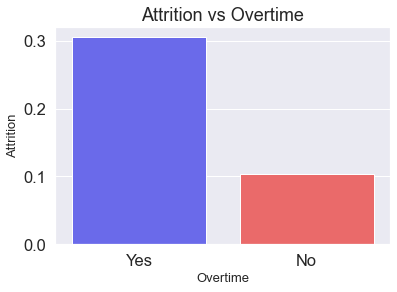

In [39]:
# Attrition vs Overtime
sns.barplot(x="OverTime", y="Attrition", data=df, ci=None, palette="seismic")
plt.title("Attrition vs Overtime")
plt.ylabel('Attrition', fontsize=13)
plt.xlabel('Overtime', fontsize=13)
plt.show()

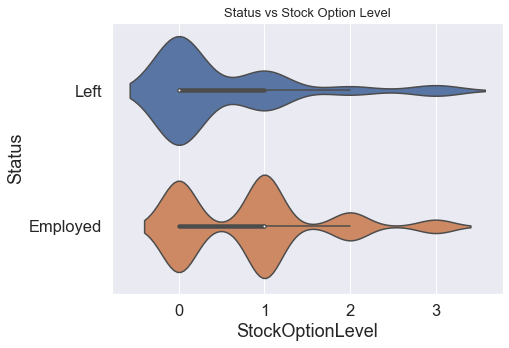

In [40]:
# Status vs Stock Option Level
plt.figure(figsize=(7,5))
sns.violinplot(y='Status', x='StockOptionLevel', data=df)
plt.title('Status vs Stock Option Level', fontsize = 13)
plt.show()

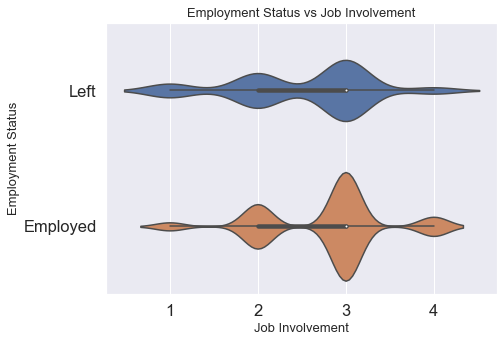

In [41]:
# Employment status vs Job Involvement(on scale of 4)
# 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
plt.figure(figsize=(7,5))
sns.violinplot(y='Status', x='JobInvolvement', data=df)
plt.title("Employment Status vs Job Involvement", fontsize = 13)
plt.xlabel("Job Involvement", fontsize=13)
plt.ylabel("Employment Status", fontsize=13)
plt.show()

**Observation:<br> Employees who left had lower job involvement. Most of the current employees have job involvement level of 3.**

In [42]:
# How to interpret violinplot
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="https://miro.medium.com/max/1040/1*TTMOaNG1o4PgQd-e8LurMg.png")

link: https://towardsdatascience.com/violin-plots-explained-fb1d115e023d

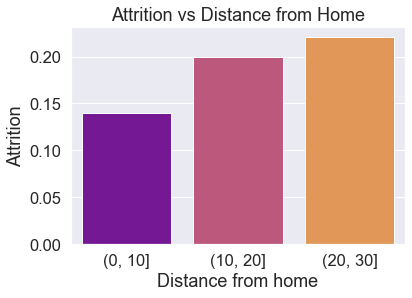

In [43]:
# Attrition vs Distance from home

# creating bins
bins = [0,10,20,30]
sns.barplot(x=pd.cut(df["DistanceFromHome"], bins=bins), y="Attrition", data=df, ci=None, palette="plasma")
plt.title("Attrition vs Distance from Home")
plt.xlabel("Distance from home")
plt.ylabel("Attrition")
plt.show()

**Observation:<br> The greater the distance from home, the higher the attration rate**

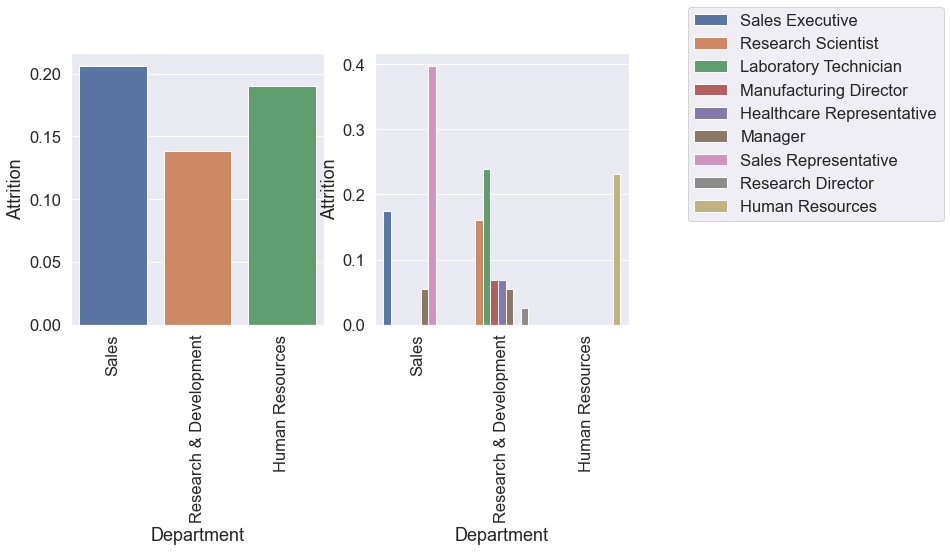

In [44]:
# Attrition vs Department and JobRole
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.barplot(ax=axes[0], y="Attrition", x="Department", data=df, ci=None)

sns.barplot(ax=axes[1], y="Attrition", x="Department", hue="JobRole", data=df, ci=None)
plt.legend(bbox_to_anchor = (1.2,1.2))
for ax in fig.axes: # rotating asix text for each subplot
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90)
plt.show()

In [45]:
display(df.groupby(["Department"])["Attrition"].value_counts(normalize=True)*100)
display(df.groupby(["Department", "JobRole"])["Attrition"].value_counts(normalize=True)*100)

Department              Attrition
Human Resources         0            80.952381
                        1            19.047619
Research & Development  0            86.160250
                        1            13.839750
Sales                   0            79.372197
                        1            20.627803
Name: Attrition, dtype: float64

Department              JobRole                    Attrition
Human Resources         Human Resources            0             76.923077
                                                   1             23.076923
                        Manager                    0            100.000000
Research & Development  Healthcare Representative  0             93.129771
                                                   1              6.870229
                        Laboratory Technician      0             76.061776
                                                   1             23.938224
                        Manager                    0             94.444444
                                                   1              5.555556
                        Manufacturing Director     0             93.103448
                                                   1              6.896552
                        Research Director          0             97.500000
                                       

**Observation:<br> Attrition rate is highest(about 21%) in Sales followed by HR department(19%). Average attrition is highest(39.76%) in Sales Representatives(from Sales Department)followed by laboratory technicians(24%) from Research & Development and HR employee(23%) from HR department**

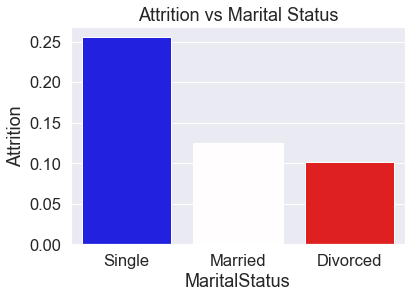

In [46]:
# Attrition vs Marital Status
sns.barplot(x="MaritalStatus", y="Attrition", data=df, ci=None, palette="seismic")
plt.title("Attrition vs Marital Status")
plt.show()


#### Observation: There is higher attrition among singles

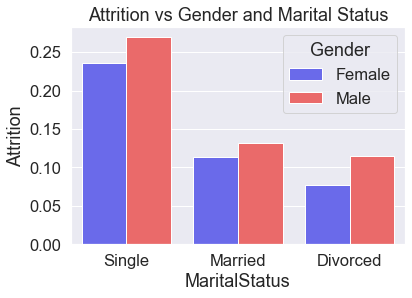

In [47]:
# Attrition vs Gender and Martial Status
sns.barplot(x="MaritalStatus", y="Attrition", data=df, hue="Gender", ci=None, palette="seismic")
plt.title("Attrition vs Gender and Marital Status")
plt.show()

**Observation: There is higher attrition among males whether signle, married, or divorced.**

## 5) Outliers

In [48]:
df.describe()

Age    Attrition    DailyRate  DistanceFromHome  \
count  1470.000000  1470.000000  1470.000000       1470.000000   
mean     36.923810     0.161224   802.485714          9.192517   
std       9.135373     0.367863   403.509100          8.106864   
min      18.000000     0.000000   102.000000          1.000000   
25%      30.000000     0.000000   465.000000          2.000000   
50%      36.000000     0.000000   802.000000          7.000000   
75%      43.000000     0.000000  1157.000000         14.000000   
max      60.000000     1.000000  1499.000000         29.000000   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  ...  PerformanceRating  \
count  1470.000000      1470.000000  ...        1470.000000   
mean      2.063946         2.728571  ...           3.153741   
std       1.106940         1.102846  ...           0.360824   
min       1.000000         1.000000  ...           3.000000   
25%       1.000000         2.000000  ...           3.000000   
50%       2.000000         3.000000  ...           3.000000   
75%       3.000000         4.000000  ...           3.000000   
max       5.000000         4.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1470.000000       1470.000000        1470.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081209          0.852077           7.780782   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 24 columns]

In [49]:
# Checking int dtype
df.select_dtypes(include="int64").columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [50]:
# Defining quantitative_variables to count outliers in each column

quantitative_variables = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','MonthlyIncome', 'MonthlyRate', 
             'PercentSalaryHike', 'TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole', 
             'YearsSinceLastPromotion','YearsWithCurrManager',"TotalWorkingYears","NumCompaniesWorked",
             "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction","PerformanceRating", "RelationshipSatisfaction",
             "WorkLifeBalance"]
df[quantitative_variables].head()

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  MonthlyRate  \
0   41       1102                 1          94           5993        19479   
1   49        279                 8          61           5130        24907   
2   37       1373                 2          92           2090         2396   
3   33       1392                 3          56           2909        23159   
4   27        591                 2          40           3468        16632   

   PercentSalaryHike  TrainingTimesLastYear  YearsAtCompany  \
0                 11                      0               6   
1                 23                      3              10   
2                 15                      3               0   
3                 11                      3               8   
4                 12                      3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                   4                        0                     5   
1                   7                        1                     7   
2                   0                        0                     0   
3                   7                        3                     0   
4                   2                        2                     2   

   TotalWorkingYears  NumCompaniesWorked  EnvironmentSatisfaction  \
0                  8                   8                        2   
1                 10                   1                        3   
2                  7                   6                        4   
3                  8                   1                        4   
4                  6                   9                        1   

   JobInvolvement  JobSatisfaction  PerformanceRating  \
0               3                4                  3   
1               2                2                  4   
2               2                3                  3   
3               3                3                  3   
4               3                2                  3   

   RelationshipSatisfaction  WorkLifeBalance  
0                         1                1  
1                         4                3  
2                         2                3  
3                         3                3  
4                         4                3

In [51]:
# Counting outliers in each column
# Considering outliers are 3 Standard deviations above and below the mean.

outlier_count = []
print("Number of outliers in each column are as follows: ","\n")
for i in quantitative_variables:
    var_mean = df[i].mean()
    var_std = df[i].std()
    cutoff = var_std*3
    lower, upper = var_mean - cutoff, var_mean + cutoff
    ind = df[(df[i] < lower) | (df[i] > upper)].index
    outlier_count.append(len(ind))
    print(i + " ", len(ind))

print("\n", "Total outlier count:", sum(outlier_count))
    

Number of outliers in each column are as follows:  

Age  0
DailyRate  0
DistanceFromHome  0
HourlyRate  0
MonthlyIncome  0
MonthlyRate  0
PercentSalaryHike  0
TrainingTimesLastYear  0
YearsAtCompany  25
YearsInCurrentRole  13
YearsSinceLastPromotion  42
YearsWithCurrManager  14
TotalWorkingYears  16
NumCompaniesWorked  0
EnvironmentSatisfaction  0
JobInvolvement  0
JobSatisfaction  0
PerformanceRating  0
RelationshipSatisfaction  0
WorkLifeBalance  0

 Total outlier count: 110


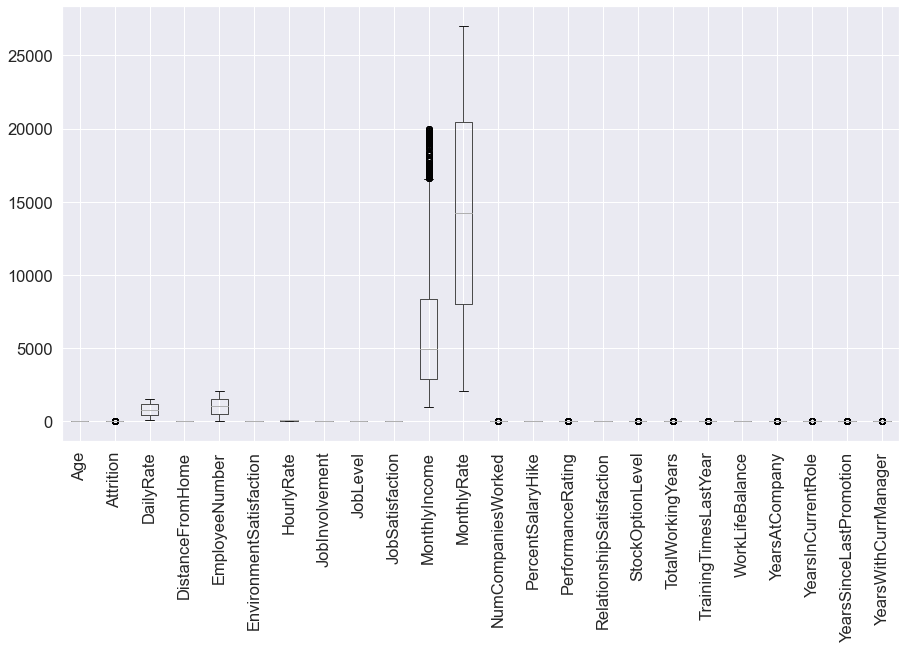

In [52]:
plt.figure(figsize=(15,8))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

#### Observation: There are very few outliers. Therefore, we reject them

## Feature Engineering

#### Deriving new feature from existing features

**job_hop_index** - Job hopper is a person who switches job frequently for financial or career advancement opportunities. Recruiters and hiring managers views job hoppers in a negative light. There is a high chance they would quit soon.

***Job hop index = Total work experience / Number of companies worked***

We dropped the following variables as we created a new variable (job_hop_index) using the following 2 variables:

- **TotalWorkingYears**
- **NumCompaniesWorked**


In [53]:
# Creating new variable called "job_hop_index" using "TotalWorkingYears" and "NumCompaniesWorked"

df["job_hop_index"] = df["TotalWorkingYears"].div(df["NumCompaniesWorked"])

In [54]:
df[["job_hop_index"]].head(10)

job_hop_index
0       1.000000
1      10.000000
2       1.166667
3       8.000000
4       0.666667
5            inf
6       3.000000
7       1.000000
8            inf
9       2.833333

In [55]:
df["job_hop_index"] = df["job_hop_index"].replace(np.inf, 0)

In [56]:
df[['job_hop_index']].head(10)

job_hop_index
0       1.000000
1      10.000000
2       1.166667
3       8.000000
4       0.666667
5       0.000000
6       3.000000
7       1.000000
8       0.000000
9       2.833333

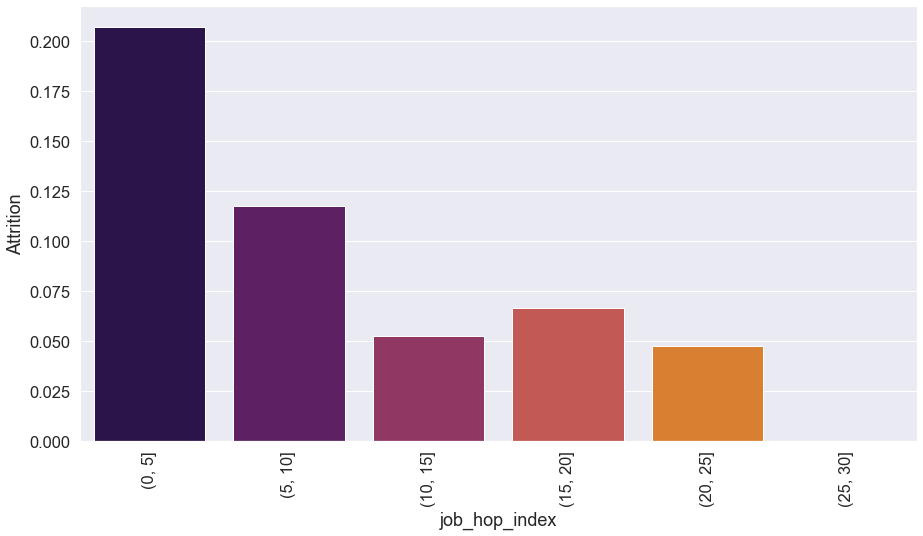

In [57]:
# Higher the index, less chances of employee leaving
plt.figure(figsize=(15,8))
sns.barplot(x=pd.cut(df["job_hop_index"], bins=[0,5,10,15,20,25,30]), y="Attrition", data=df, palette="inferno", ci=None)
plt.xticks(rotation=90)
plt.show()

**Features dropped before initial model development - "EmployeeNumber",
"TotalWorkingYears", "NumCompaniesWorked"**

<ins>An Employee Number</ins> is a unique number that has been assigned to each current and former State employee and elected official in the position and personnel DataBase(PPDB). It does not give any useful information for prediction. Therefore, we drop them.

In [58]:
X = df.drop(columns = ["Attrition", "EmployeeNumber", "TotalWorkingYears", "NumCompaniesWorked", "Status"])
outcome = "Attrition"

In [59]:
# defining target varible and predictors
X = pd.get_dummies(X, drop_first=True)
y = df[outcome]

In [60]:
X.head()

Age  DailyRate  DistanceFromHome  EnvironmentSatisfaction  HourlyRate  \
0   41       1102                 1                        2          94   
1   49        279                 8                        3          61   
2   37       1373                 2                        4          92   
3   33       1392                 3                        4          56   
4   27        591                 2                        1          40   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  ...  \
0               3         2                4           5993        19479  ...   
1               2         2                2           5130        24907  ...   
2               2         1                3           2090         2396  ...   
3               3         1                3           2909        23159  ...   
4               3         1                2           3468        16632  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                             0                      0                     1   
1                             0                      1                     0   
2                             0                      0                     1   
3                             0                      1                     0   
4                             0                      1                     0   

   OverTime_Yes  
0             1  
1             0  
2             1  
3             1  
4             0  

[5 rows x 46 columns]

In [61]:
# Split validation
train_X, valid_X, train_y, valid_y = train_test_split(X,y,test_size=0.30, random_state=1)

## Create a baseline model<Br> - Decision Tree, logistic regression, deep learning, gradient boosted trees

**Modeling**<br>
We test with 5 models to find the best model:
1. Decision Tree Classifier
2. Logistic Regression
3. Naive Bayes
4. Random Forest Classifier
5. Gradient Boosted Trees

## 1. Decision Tree

In [62]:
# To avoid overfitting, we have restricted tree depth to 4

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(train_X, train_y)
#plotDecisionTree(dt, feature_names=train_X.columns, class_names=dt.classes_)

DecisionTreeClassifier(max_depth=4)

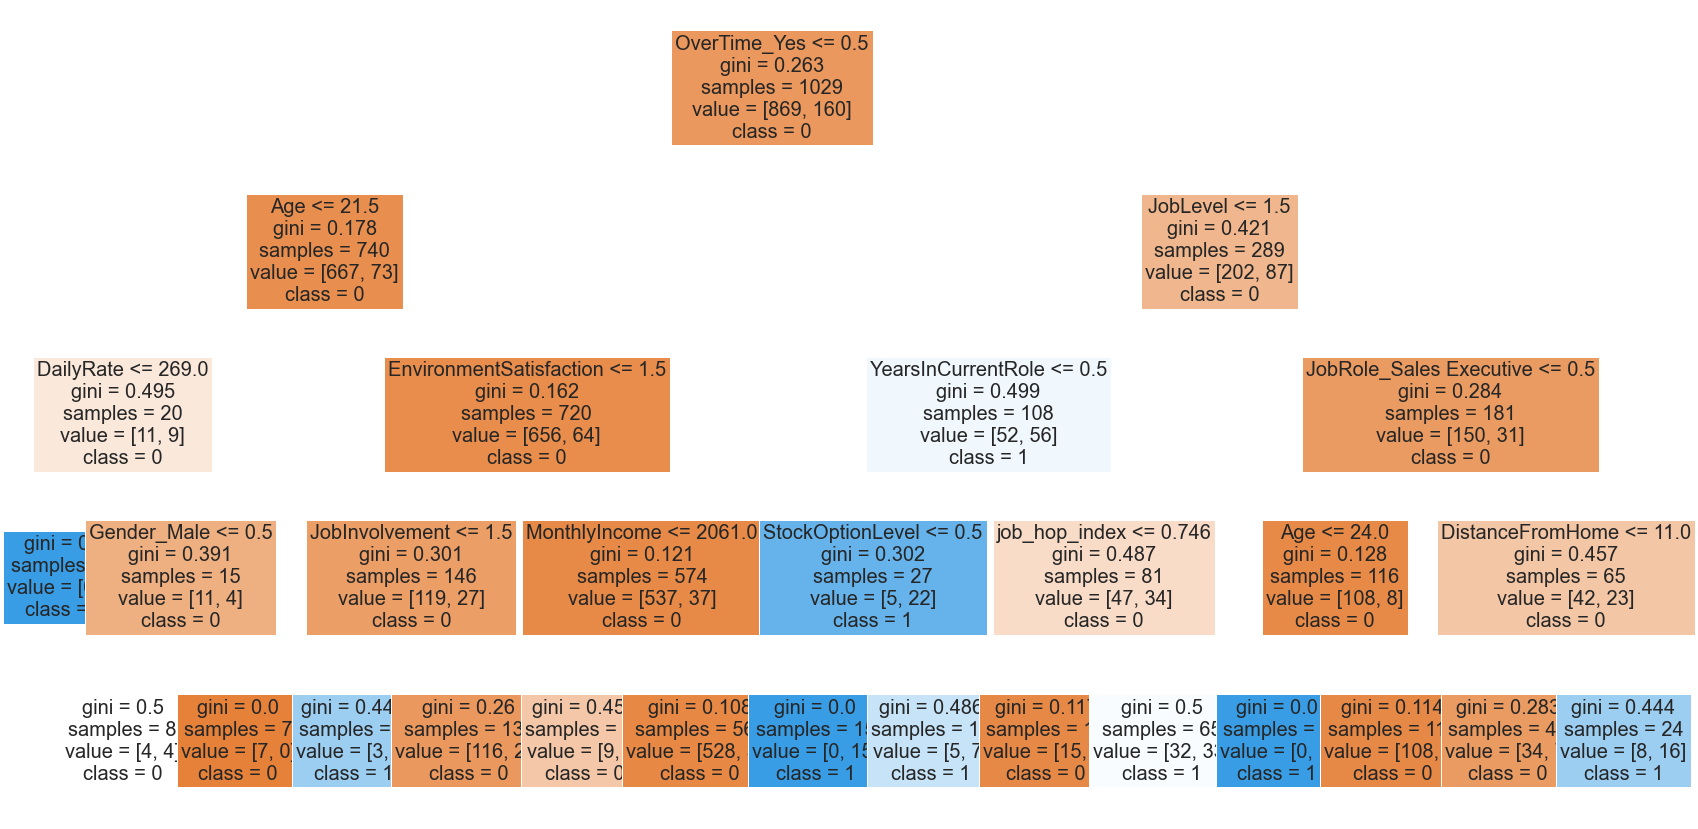

In [63]:
from sklearn import tree
plt.figure(figsize=(30,15))
tree.plot_tree(dt, feature_names = train_X.columns, class_names = ['0','1'], filled=True, fontsize=20)
plt.show()

In [64]:
# dt = DecisionTreeClassifier(max_depth=4)
# dt.fit(train_X, train_y)
# plotDecisionTree(dt, feature_names=train_X.columns, class_names=dt.classes_)

In [65]:
# Get the prediction for both train and test
prediction_train_dt = dt.predict(train_X)
prediction_valid_dt = dt.predict(valid_X)

print("Accuracy on training set:", round(accuracy_score(train_y, prediction_train_dt),2))
print("Accuracy on test set:", round(accuracy_score(valid_y, prediction_valid_dt),2))

Accuracy on training set: 0.88
Accuracy on test set: 0.83


In [66]:
# Calculating precision, recall, and F-measure on validation set
p1 = round(precision_score(valid_y, prediction_valid_dt),2)
r1 = round(recall_score(valid_y, prediction_valid_dt),2)
f1_1 = round(f1_score(valid_y, prediction_valid_dt),2)
a1 = round(accuracy_score(valid_y, prediction_valid_dt),2)

print("Scores for prediction on validation set")
print("Precision score:", p1)
print("Recall score:", r1)
print("f1-score:", f1_1)
print("Accuracy:", a1)

Scores for prediction on validation set
Precision score: 0.54
Recall score: 0.34
f1-score: 0.42
Accuracy: 0.83


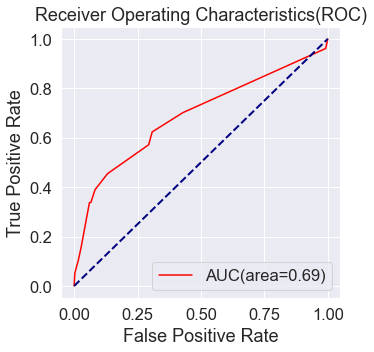

In [67]:
# Plotting ROC Curve
from sklearn.metrics import auc, roc_curve

# Creating a function for ROC graph plotting to be used by other models
def roc_graph(clf, validy, validx):
    fpr, tpr, _ = roc_curve(validy, clf.predict_proba(validx)[:,1])
    area=auc(fpr,tpr)
    
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, color="red", label="AUC(area=%.2f)" % area)
    plt.plot((0,1),(0,1), color = "navy", linestyle="--", lw=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristics(ROC)")
    plt.legend(loc="lower right")
    plt.show()
    
    
roc_graph(dt, valid_y, valid_X)
    

In [68]:
Image(url= "https://acutecaretesting.org/-/media/acutecaretesting/articles/table-iv-categorization-of-roc-curves.gif?w=235&h=139&as=1")

## 2. Logistic Regression

In [69]:
# Build the logistic regression model logit_reg
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

logit = LogisticRegression(solver="liblinear")
logit.fit(train_X, train_y)

# Predictions on training and validation set
prediction_train_log = logit.predict(train_X)
prediction_valid_log = logit.predict(valid_X)
print("Accuracy on train:", round(accuracy_score(train_y, prediction_train_log),2))
print("Accuracy on test:", round(accuracy_score(valid_y, prediction_valid_log),2))

Accuracy on train: 0.88
Accuracy on test: 0.85


In [70]:
# Calculating precision, recall and F-measure
p2= round(precision_score(valid_y, prediction_valid_log),2)
r2= round(recall_score(valid_y, prediction_valid_log),2)
f1_2= round(f1_score(valid_y, prediction_valid_log),2)
a2 = round(accuracy_score(valid_y, prediction_valid_log),2)

print("Scores for prediction on validation set")
print("Precision score:", p2)
print("Recall score:", r2)
print("f1-score:", f1_2)
print("Accuracy score:", a2)

Scores for prediction on validation set
Precision score: 0.74
Recall score: 0.26
f1-score: 0.38
Accuracy score: 0.85


In [71]:
# Calling the function with Logistic regressor inputs
roc_graph(logit, valid_y, valid_X)

## 3. Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Run naive bayes
nb=GaussianNB()
nb.fit(train_X, train_y)

# Predict probabilities
pred_train_prob_nb = nb.predict_proba(valid_X)

# Prediction accuracy on training and validation set

prediction_train_nb = nb.predict(train_X)
prediction_valid_nb = nb.predict(valid_X)
print("Accuracy on train:", round(accuracy_score(train_y, prediction_train_nb),2))
print("Accuracy on test:", round(accuracy_score(valid_y, prediction_valid_nb),2))

Accuracy on train: 0.82
Accuracy on test: 0.79


In [73]:
# Calculating precision, recall, and f-measure on valid
p3 = round(precision_score(valid_y, prediction_valid_nb),2)
r3 = round(recall_score(valid_y, prediction_valid_nb),2)
f1_3 = round(f1_score(valid_y, prediction_valid_nb),2)
a3 = round(accuracy_score(valid_y, prediction_valid_nb),2)

print("Scores for prediction on validation set ")
print("Precision score:", p3)
print("Recall score:", r3)
print("f1-score:", f1_3)
print("Accuracy:", a3)

Scores for prediction on validation set 
Precision score: 0.43
Recall score: 0.64
f1-score: 0.51
Accuracy: 0.79


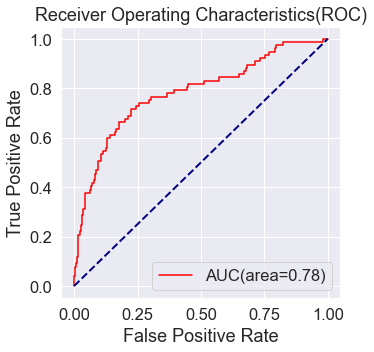

In [74]:
roc_graph(nb, valid_y, valid_X)

## 4. Random Forest

In [75]:
rf = RandomForestClassifier(criterion="entropy", random_state=42, n_estimators=500)
rf.fit(train_X, train_y)

# Model evaluation on training set
print("Accuracy on training set:", accuracy_score(train_y, rf.predict(train_X)))

# Model evaluation on validation set
print("Accuracy on validation set:", round(accuracy_score(valid_y, rf.predict(valid_X)),2))

Accuracy on training set: 1.0
Accuracy on validation set: 0.84


In [76]:
p4 = precision_score(valid_y, rf.predict(valid_X))
r4 = recall_score(valid_y, rf.predict(valid_X))
f1_4 = f1_score(valid_y, rf.predict(valid_X))
a4 = accuracy_score(valid_y, rf.predict(valid_X))

print("Scores for prediction on validation set")
print("Precision:", round(p4,2))
print("Recall:", round(r4,2))
print("F1:", round(f1_4,2))
print("Accuracy:", round(a4,2))

Scores for prediction on validation set
Precision: 0.77
Recall: 0.13
F1: 0.22
Accuracy: 0.84


### Calling the function with Random forest inputs
roc_graph(rf, valid_y, valid_X)

## 5. Gradient Boosting Classifier

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1,
                                random_state=0)

clf.fit(train_X, train_y)
print("Accuracy on training set:", round(accuracy_score(train_y, clf.predict(train_X)),2))
print("Accuracy on validation set:", round(accuracy_score(valid_y, clf.predict(valid_X)),2))

Accuracy on training set: 0.93
Accuracy on validation set: 0.84


In [78]:
p5 = round(precision_score(valid_y, clf.predict(valid_X)),4)
r5 = round(recall_score(valid_y, clf.predict(valid_X)),4)
f1_5 = round(f1_score(valid_y, clf.predict(valid_X)),4)
a5 = round(accuracy_score(valid_y, clf.predict(valid_X)),4)

print("precision score:", round(p5,2))
print("recall score", round(r5,2))
print("f1-score", round(f1_5,2))
print("Accuracy:", round(a5,2))

precision score: 0.54
recall score 0.43
f1-score 0.48
Accuracy: 0.84


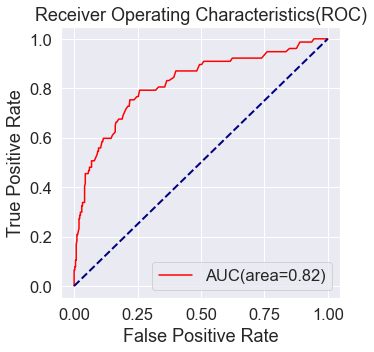

In [79]:
# Calling the function with Gradient Boosting Classifier inputs
roc_graph(rf, valid_y, valid_X)

### a. What is the precision, recall, and f-measure?

<br>**Precision** quantifies the number of positive class predictions that actually belong to the positive class.
<br>Precision = True Positivies / (True Positivies + False Positives)
<br>
<br>**Recall** is a measure of the proportion of actual positive cases that got predicted as positive.
<br>Recall = TruePositives / (TruePositivies + False Negatives)
<br>
<br>**F-Measure** is the weighted average of Precision and Recall.
<br>F-Measure = (2*Precision*Recall) / (Precision + Recall)

### Comparing table of Precision, Recall, and F-measure and accuracy for all the models

In [80]:
# Creating lists of all scores for comparision
p = [p1,p2,p3,p4,p5]
r = [r1,r2,r3,r4,r5]
f = [f1_1, f1_2, f1_3, f1_4, f1_5]
acc = [a1,a2,a3,a4,a5]
# area = [area1,area2,area3]

# Dataframe for comparison
df_metrics = pd.DataFrame({"Classifier":["Decision Tree Classifier", "Logistic Regression", "Naive Bayes", "Random Forest", "Gradient Boosting Classifier"], "Precision":p, "Recall":r, "F score":f, "Accuracy":acc})
df_metrics

Classifier  Precision   Recall   F score  Accuracy
0      Decision Tree Classifier   0.540000  0.34000  0.420000   0.83000
1           Logistic Regression   0.740000  0.26000  0.380000   0.85000
2                   Naive Bayes   0.430000  0.64000  0.510000   0.79000
3                 Random Forest   0.769231  0.12987  0.222222   0.84127
4  Gradient Boosting Classifier   0.541000  0.42860  0.478300   0.83670

### <ins>We want both high precision and high recall. We aim to reduce both false positives and false negatives(FN) as much as possible. </ins> If there are more false positives(FP) in the prediction, company would be spending resources on keeping the employee who is not likely to leave. If there are more false negatives(FN), compnay has a chance of losing a top performer. Therefore, we choose a classifier with highest F-score. Although Naive Bayes has the highest F-score, its accuracy is low. Gradient Boosting Classifier has high F-1 score and high accuracy. 

## Most important features as per Gradient Boosting Model

MonthlyIncome                       0.180473
OverTime_Yes                        0.156518
job_hop_index                       0.077584
StockOptionLevel                    0.076651
EnvironmentSatisfaction             0.054854
JobInvolvement                      0.047894
TrainingTimesLastYear               0.043295
YearsWithCurrManager                0.042572
DailyRate                           0.042523
Age                                 0.036393
Department_Sales                    0.032872
DistanceFromHome                    0.025882
BusinessTravel_Travel_Frequently    0.023135
WorkLifeBalance                     0.021695
MonthlyRate                         0.019267
JobSatisfaction                     0.015344
RelationshipSatisfaction            0.014989
YearsSinceLastPromotion             0.013646
YearsAtCompany                      0.012422
EducationField_Marketing            0.012342
dtype: float64

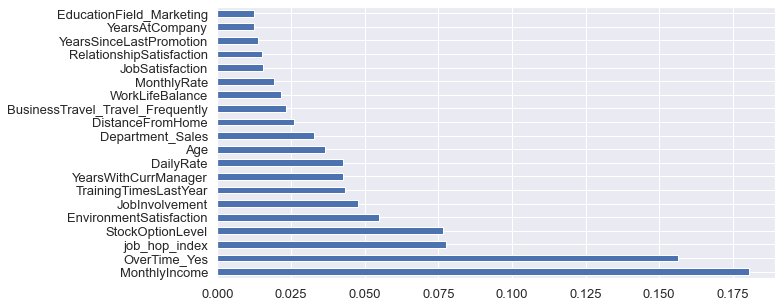

In [81]:
# Selecting 20 most important variables/features in Gradient Boosting model 

feat_importances = pd.Series(clf.feature_importances_, index=train_X.columns)
feat_importances = feat_importances.nlargest(20)
display(feat_importances)
plt.figure(figsize=(10,5))
feat_importances.plot(kind='barh', fontsize = 13)
plt.show()

In [82]:
# Building the model using the features that are important as per Gradient boosting classifier
clf_imp_features = list(feat_importances.index)
X_selected = X[clf_imp_features]
X_selected.head()

MonthlyIncome  OverTime_Yes  job_hop_index  StockOptionLevel  \
0           5993             1       1.000000                 0   
1           5130             0      10.000000                 1   
2           2090             1       1.166667                 0   
3           2909             1       8.000000                 0   
4           3468             0       0.666667                 1   

   EnvironmentSatisfaction  JobInvolvement  TrainingTimesLastYear  \
0                        2               3                      0   
1                        3               2                      3   
2                        4               2                      3   
3                        4               3                      3   
4                        1               3                      3   

   YearsWithCurrManager  DailyRate  Age  Department_Sales  DistanceFromHome  \
0                     5       1102   41                 1                 1   
1                     7        279   49                 0                 8   
2                     0       1373   37                 0                 2   
3                     0       1392   33                 0                 3   
4                     2        591   27                 0                 2   

   BusinessTravel_Travel_Frequently  WorkLifeBalance  MonthlyRate  \
0                                 0                1        19479   
1                                 1                3        24907   
2                                 0                3         2396   
3                                 1                3        23159   
4                                 0                3        16632   

   JobSatisfaction  RelationshipSatisfaction  YearsSinceLastPromotion  \
0                4                         1                        0   
1                2                         4                        1   
2                3                         2                        0   
3                3                         3                        3   
4                2                         4                        2   

   YearsAtCompany  EducationField_Marketing  
0               6                         0  
1              10                         0  
2               0                         0  
3               8                         0  
4               2                         0

In [83]:
# Splitting the dataset
trainx, validx, trainy, validy = train_test_split(X_selected, y, test_size =0.3, random_state=1)

# Run the gradient boost model
clf1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=1)

clf1.fit(trainx, trainy)
pred_valid_clf1 = clf1.predict(validx)

# Calculating precision, recall and F-measure on valid
p = precision_score(validy, pred_valid_clf1)
r = recall_score(validy, pred_valid_clf1)
f1 = f1_score(validy, pred_valid_clf1)
a = accuracy_score(validy, pred_valid_clf1)

print("Precision score:", round(p,3))
print("Recall score:", round(p,3))
print("f1-score:", round(f1,3))
print("Accuracy:", round(a,3))

Precision score: 0.547
Recall score: 0.547
f1-score: 0.446
Accuracy: 0.837


#### Gradient Boosting Classifier before using the most important features gave following scores.
- precision score: 0.51
- recall score 0.42
- f1-score 0.46
- Accuracy: 0.83
#### As we see, using the most important features as per Gradient Boost Classifier, we could not improve the precision, recall and f-score. Therefore, we will do feature selection/reduction using PCA and Wrapper methods.

## 4. Feature Engineering

Done at the beginning where we derived new feature from existing features.<br>
**job_hop_index**: using "TotalWorkingYears" and "NumberCompaniesWorked.<br>
<br>**job hop index** = TotalWorkingYears/NumberCompaniesWorked

This helped us drop 2 variables("TotalWorkingYears" and "NumberCompaniesWorked") at the beginning of building base models

## 5. Feature Reduction/Parameter Optimization

### a) PCA
### b) Filter based methods - visualization and correlation
### c) Wrapper method - Forward selection

In [84]:
# Creating copy of predictorsx
X_reduced = X.copy()

In [85]:
X_reduced.head(3)

Age  DailyRate  DistanceFromHome  EnvironmentSatisfaction  HourlyRate  \
0   41       1102                 1                        2          94   
1   49        279                 8                        3          61   
2   37       1373                 2                        4          92   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  ...  \
0               3         2                4           5993        19479  ...   
1               2         2                2           5130        24907  ...   
2               2         1                3           2090         2396  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                             0                      0                     1   
1                             0                      1                     0   
2                             0                      0                     1   

   OverTime_Yes  
0             1  
1             0  
2             1  

[3 rows x 46 columns]

## a) PCA for quantitative variables

In [86]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca = PCA()

In [87]:
quantitative_var = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','MonthlyIncome', 
             'MonthlyRate','PercentSalaryHike', 'TrainingTimesLastYear',
             'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion',
             'YearsWithCurrManager',"job_hop_index", 
             "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction",
             "PerformanceRating", "RelationshipSatisfaction", "WorkLifeBalance"]

In [88]:
df[quantitative_var].head()

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  MonthlyRate  \
0   41       1102                 1          94           5993        19479   
1   49        279                 8          61           5130        24907   
2   37       1373                 2          92           2090         2396   
3   33       1392                 3          56           2909        23159   
4   27        591                 2          40           3468        16632   

   PercentSalaryHike  TrainingTimesLastYear  YearsAtCompany  \
0                 11                      0               6   
1                 23                      3              10   
2                 15                      3               0   
3                 11                      3               8   
4                 12                      3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                   4                        0                     5   
1                   7                        1                     7   
2                   0                        0                     0   
3                   7                        3                     0   
4                   2                        2                     2   

   job_hop_index  EnvironmentSatisfaction  JobInvolvement  JobSatisfaction  \
0       1.000000                        2               3                4   
1      10.000000                        3               2                2   
2       1.166667                        4               2                3   
3       8.000000                        4               3                3   
4       0.666667                        1               3                2   

   PerformanceRating  RelationshipSatisfaction  WorkLifeBalance  
0                  3                         1                1  
1                  4                         4                3  
2                  3                         2                3  
3                  3                         3                3  
4                  3                         4                3

In [89]:
# Normalizing
pca.fit(preprocessing.scale(df[quantitative_var]))

PCA()

PC1    PC2    PC3    PC4    PC5    PC6    PC7  \
Standard deviation      1.951  1.337  1.081  1.061  1.038  1.029  1.018   
Proportion of variance  0.200  0.094  0.061  0.059  0.057  0.056  0.054   
Cumulative proportion   0.200  0.294  0.356  0.415  0.472  0.527  0.582   

                          PC8    PC9   PC10   PC11   PC12   PC13   PC14  \
Standard deviation      0.997  0.991  0.979  0.974  0.950  0.941  0.790   
Proportion of variance  0.052  0.052  0.050  0.050  0.047  0.047  0.033   
Cumulative proportion   0.634  0.686  0.736  0.786  0.834  0.880  0.913   

                         PC15   PC16   PC17   PC18   PC19  
Standard deviation      0.724  0.679  0.529  0.474  0.408  
Proportion of variance  0.028  0.024  0.015  0.012  0.009  
Cumulative proportion   0.941  0.965  0.979  0.991  1.000

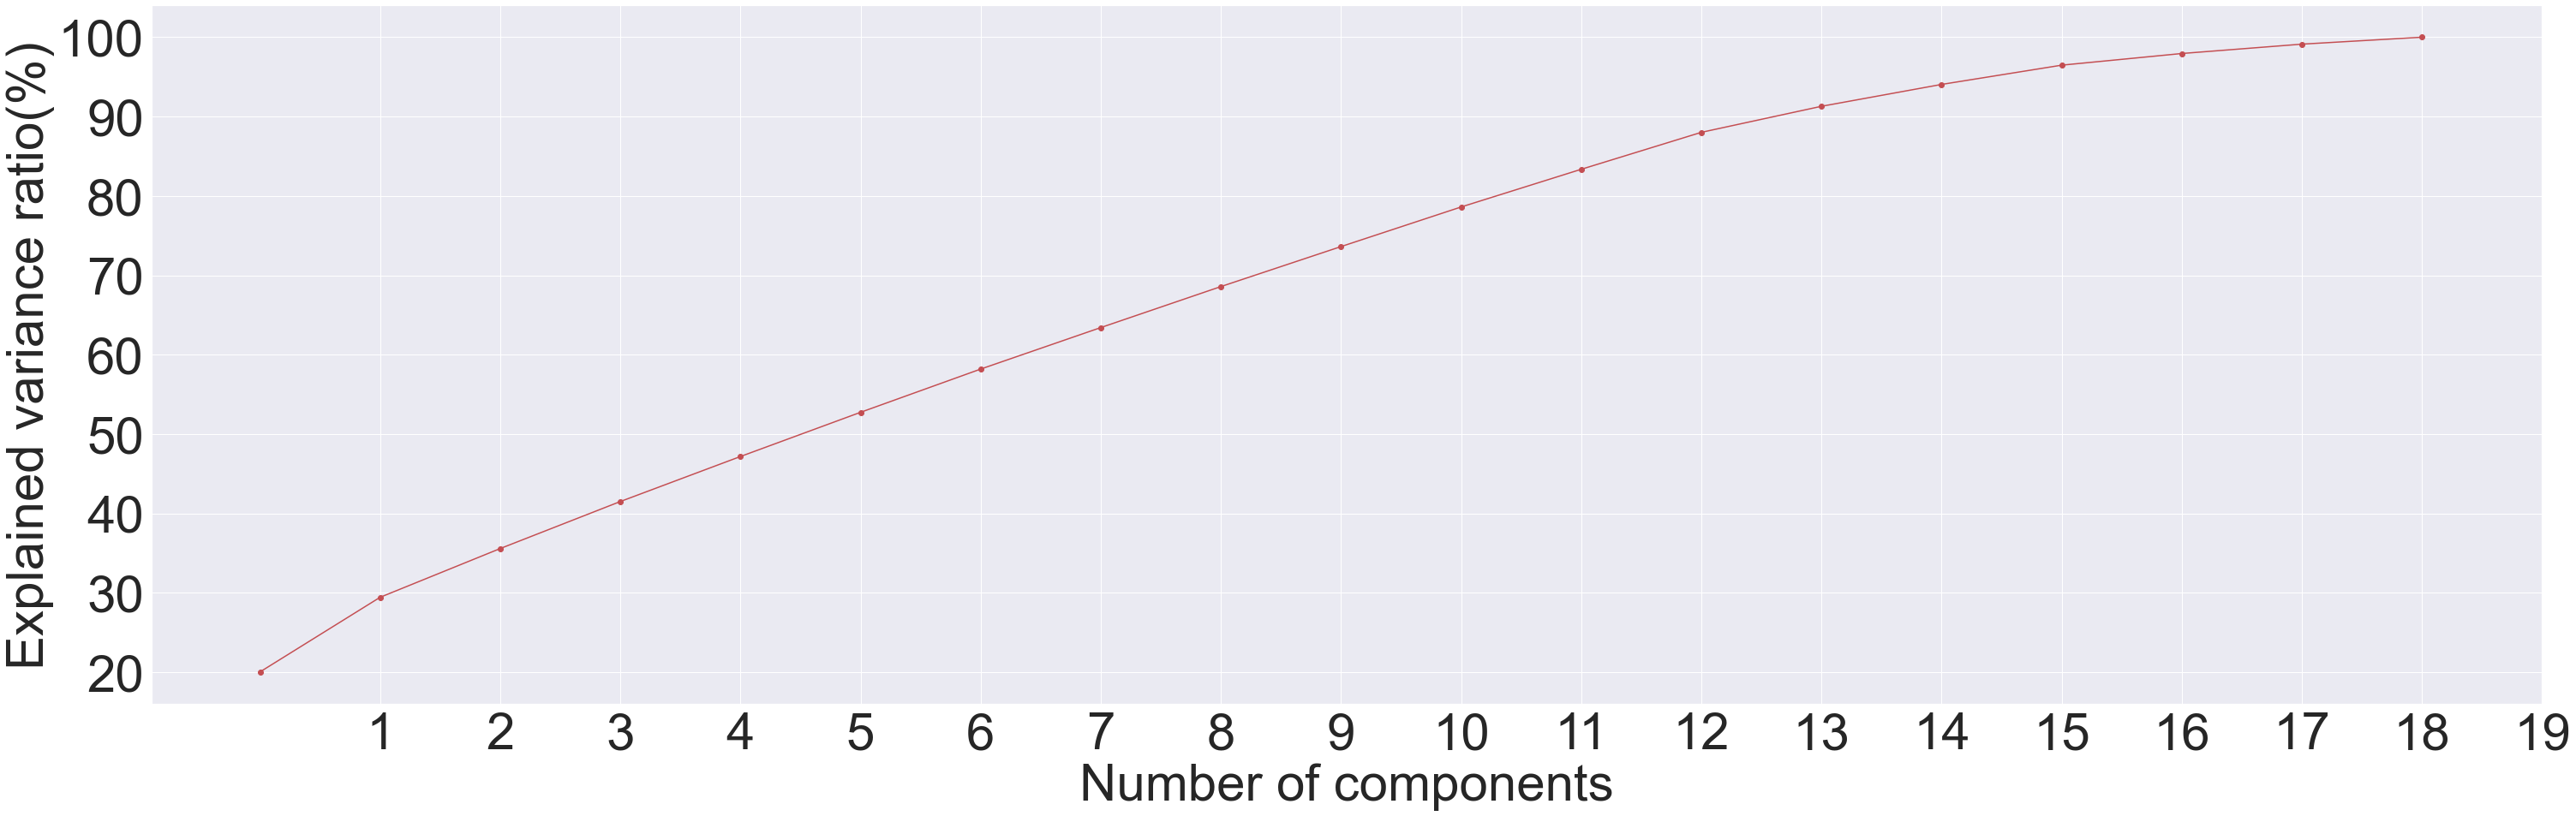

In [90]:
# Summary
summary_df = pd.DataFrame({"Standard deviation": np.sqrt(pca.explained_variance_),
                          "Proportion of variance": pca.explained_variance_ratio_,
                           "Cumulative proportion": np.cumsum(pca.explained_variance_ratio_)
                          })

summary_df = summary_df.round(3).transpose()

summary_df.columns = ["PC"+str(i) for i in range(1, len(summary_df.columns)+1)]
display(summary_df)

# Plotting PCA
cum_prop = np.cumsum(pca.explained_variance_ratio_ )*100
fig, ax = plt.subplots(figsize = (50,15))
ax.plot(cum_prop, '-ro')
ax.set_xticks(np.arange(1, len(cum_prop)+1))
plt.xlabel("Number of components", fontsize = 60)
plt.ylabel("Explained variance ratio(%)", fontsize = 60)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
ax.grid(True)

In [91]:
components_df = pd.DataFrame(pca.components_.transpose(),
                            columns = summary_df.columns,
                             index = df[quantitative_var].columns)

components_df = components_df.iloc[:,:]
components_df

PC1       PC2       PC3       PC4       PC5  \
Age                       0.234743 -0.011482  0.567719  0.296846 -0.028304   
DailyRate                -0.011889  0.017143  0.251464 -0.143783  0.483158   
DistanceFromHome          0.012573  0.062340  0.106955 -0.183368 -0.018989   
HourlyRate               -0.015363 -0.008393  0.330950 -0.451121 -0.297154   
MonthlyIncome             0.331000 -0.031592  0.366052  0.266621 -0.033116   
MonthlyRate              -0.005143 -0.017032  0.111321  0.419921 -0.237048   
PercentSalaryHike        -0.012926  0.701203  0.041798  0.030200 -0.016510   
TrainingTimesLastYear    -0.005515 -0.018956 -0.183745  0.019645 -0.158972   
YearsAtCompany            0.472352 -0.008386 -0.098204 -0.062854  0.013026   
YearsInCurrentRole        0.421580  0.024493 -0.194713 -0.134639  0.029220   
YearsSinceLastPromotion   0.368807  0.000745 -0.130386 -0.051245 -0.019395   
YearsWithCurrManager      0.416896  0.013547 -0.193851 -0.183708  0.023331   
job_hop_index             0.351162  0.011299  0.030234  0.044486  0.027206   
EnvironmentSatisfaction   0.003116 -0.055547 -0.085774  0.325547  0.014026   
JobInvolvement           -0.005544 -0.041593  0.298177 -0.362722  0.079050   
JobSatisfaction          -0.006150  0.024128 -0.096062  0.280506  0.590318   
PerformanceRating         0.008774  0.700813  0.017166  0.019065 -0.043856   
RelationshipSatisfaction  0.012864 -0.068689  0.262492  0.042586 -0.141336   
WorkLifeBalance           0.016521 -0.006897 -0.183998  0.162835 -0.463420   

                               PC6       PC7       PC8       PC9      PC10  \
Age                      -0.071575  0.164872  0.073133 -0.081188 -0.003998   
DailyRate                -0.295286 -0.196524  0.205490  0.345363 -0.310874   
DistanceFromHome          0.618943 -0.145282 -0.361810  0.328559 -0.273194   
HourlyRate                0.052841  0.125925  0.225758  0.093406 -0.290236   
MonthlyIncome            -0.057400  0.159209  0.073168 -0.067699 -0.063160   
MonthlyRate               0.352586 -0.117245  0.098557  0.491817  0.185860   
PercentSalaryHike        -0.050843 -0.031270 -0.003692  0.005960  0.029844   
TrainingTimesLastYear    -0.436522  0.327810 -0.084629  0.686896  0.187188   
YearsAtCompany            0.005769 -0.009505 -0.009214  0.009131  0.022160   
YearsInCurrentRole       -0.004078 -0.112176  0.015725  0.054558 -0.002955   
YearsSinceLastPromotion   0.017504 -0.067448 -0.030595  0.009155  0.083192   
YearsWithCurrManager      0.008949 -0.085984 -0.002781  0.021303  0.072058   
job_hop_index             0.059547  0.087434 -0.035677  0.035711 -0.120925   
EnvironmentSatisfaction  -0.056480 -0.682732  0.309042  0.044356  0.000788   
JobInvolvement           -0.183105 -0.363923 -0.072991  0.124691  0.225479   
JobSatisfaction           0.023534  0.154610 -0.317853  0.084567 -0.292992   
PerformanceRating        -0.048258 -0.037673 -0.003138 -0.020483  0.041286   
RelationshipSatisfaction -0.253313 -0.261472 -0.725333 -0.092728  0.187931   
WorkLifeBalance          -0.305455 -0.158696 -0.133334 -0.023870 -0.684881   

                              PC11      PC12      PC13      PC14      PC15  \
Age                       0.000488  0.243468 -0.058903 -0.294204 -0.150146   
DailyRate                 0.256704 -0.204628  0.431340 -0.025530  0.026972   
DistanceFromHome          0.189819  0.420580  0.045614 -0.122279 -0.013013   
HourlyRate                0.087537 -0.373592 -0.535466  0.016554  0.014907   
MonthlyIncome            -0.010733  0.147875  0.043934 -0.003193  0.049807   
MonthlyRate              -0.277322 -0.472611  0.163526  0.035222 -0.033489   
PercentSalaryHike        -0.007471  0.001459 -0.020221  0.000906 -0.007700   
TrainingTimesLastYear     0.141051  0.268098 -0.188258 -0.018682 -0.003763   
YearsAtCompany            0.007840 -0.050108 -0.020575  0.043936 -0.103829   
YearsInCurrentRole       -0.041358 -0.103124  0.010251 -0.172168 -0.291767   
YearsSinceLastPromotion   0.041110 -0.112096 -0.016

In [92]:
col_list = list(components_df.columns)
col_list2 = []

for i in col_list:
    col_list2.append(max(components_df[i]))
    print("Max of {}".format(i), round(max(components_df[i]),2))
    
print("\n")
print("The higest number is:", round(max(col_list2),2))


Max of PC1 0.47
Max of PC2 0.7
Max of PC3 0.57
Max of PC4 0.42
Max of PC5 0.59
Max of PC6 0.62
Max of PC7 0.33
Max of PC8 0.31
Max of PC9 0.69
Max of PC10 0.23
Max of PC11 0.31
Max of PC12 0.42
Max of PC13 0.43
Max of PC14 0.84
Max of PC15 0.81
Max of PC16 0.77
Max of PC17 0.75
Max of PC18 0.71
Max of PC19 0.86


The higest number is: 0.86


### Observation: <br>First 14 components contribute to 91% of variance.

**The following variables which have maximum weightage in each component are important variables and hence cannot be discarded.**

- YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, job_hop_index are most important for PC1
- PercentSalaryHike, PerformanceRating are most important for PC2
- MonthlyIncome, Age are most important for PC3
- HourlyRate, MonthlyRate are important for PC4
- JobSatisfaction, WorkLifeBalance, DallyRate are important PC5
- DistanceFromHome and TrainingTimesLastYear are important for PC6
- EnvironmentSatisfaction and JobInvolvement are most important for PC7

# <font color = "red">Need one more check! Can't find the exact reason</font>
Performing PCA, following features removed<br>
**"YearsSinceLastPromotion"** since it has only high weight in PC15<br>
**"WorkLifeBalance"** since it does not carry highest weight in any component



In [93]:
X_reduced = X_reduced.drop(columns=["YearsSinceLastPromotion", "WorkLifeBalance"])

In [94]:
X_reduced.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'job_hop_index',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'Education_College', 'Education_Bachelor', 'Education_Master',
       'Education_Doctor', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Sc

## b(i) Filtering - Removing some categorical features based on plot

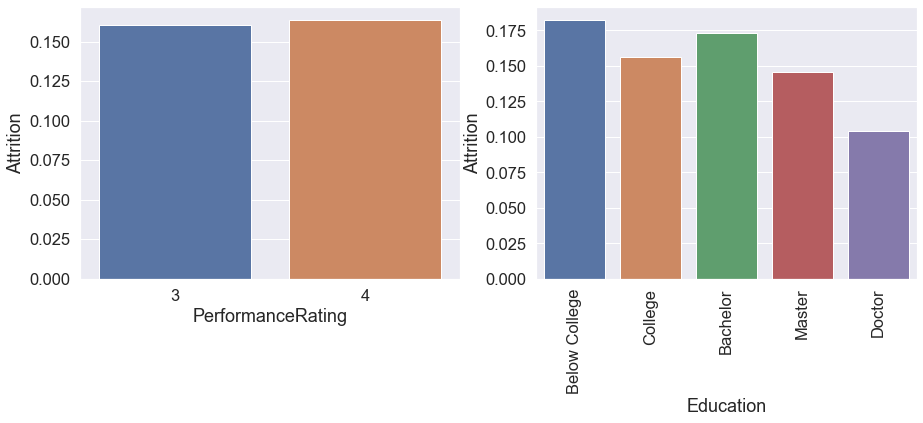

In [95]:
# Performance Rating vs Attrition

fig, axes = plt.subplots(ncols=2, figsize = (15,5))
sns.barplot(ax = axes[0], x = df["PerformanceRating"], y="Attrition", data=df, ci=None)
sns.barplot(ax = axes[1], x = df["Education"], y="Attrition", data=df, ci=None)
plt.xticks(rotation=90)
plt.show()

### Observation: 
- Attrition rate is constant accross various categories of "PerformanceRating" and "Education"
- "PerformanceRating" and "Education" are not good predictors. Therefore, we remove them from predictors.

In [99]:
for i in X_reduced.columns:
    if "Education" in i:
        print(i)

Education_College
Education_Bachelor
Education_Master
Education_Doctor
EducationField_Life Sciences
EducationField_Marketing
EducationField_Medical
EducationField_Other
EducationField_Technical Degree


In [100]:
X_reduced = X_reduced.drop(columns = ["Education_College", "Education_Bachelor", "Education_Master", "Education_Doctor", "PerformanceRating"])

In [101]:
X_reduced.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager',
       'job_hop_index', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalSt

In [102]:
X_reduced.shape

(1470, 39)

## b(ii) Filtering - Removing features that are correlated

In [103]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Status',
       'job_hop_index'],
      dtype='object')

MonthlyIncome  MonthlyRate  PercentSalaryHike  \
MonthlyIncome              1.000000     0.034814          -0.027269   
MonthlyRate                0.034814     1.000000          -0.006429   
PercentSalaryHike         -0.027269    -0.006429           1.000000   
YearsAtCompany             0.514285    -0.023655          -0.035991   
YearsInCurrentRole         0.363818    -0.012815          -0.001520   
YearsWithCurrManager       0.344079    -0.036746          -0.011985   
job_hop_index              0.408088    -0.006971          -0.010788   

                      YearsAtCompany  YearsInCurrentRole  \
MonthlyIncome               0.514285            0.363818   
MonthlyRate                -0.023655           -0.012815   
PercentSalaryHike          -0.035991           -0.001520   
YearsAtCompany              1.000000            0.758754   
YearsInCurrentRole          0.758754            1.000000   
YearsWithCurrManager        0.769212            0.714365   
job_hop_index               0.599723            0.432492   

                      YearsWithCurrManager  job_hop_index  
MonthlyIncome                     0.344079       0.408088  
MonthlyRate                      -0.036746      -0.006971  
PercentSalaryHike                -0.011985      -0.010788  
YearsAtCompany                    0.769212       0.599723  
YearsInCurrentRole                0.714365       0.432492  
YearsWithCurrManager              1.000000       0.437485  
job_hop_index                     0.437485       1.000000

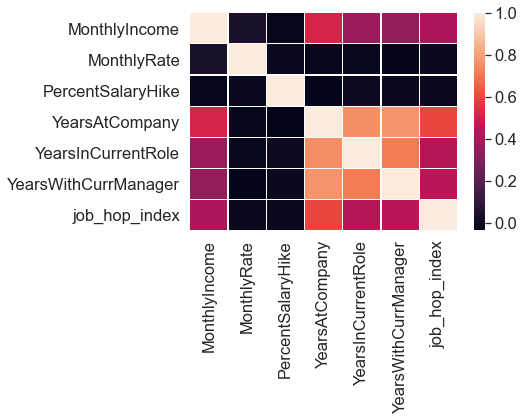

In [104]:
corr_df = df[['MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike','YearsAtCompany',
           'YearsInCurrentRole', 'YearsWithCurrManager', 'job_hop_index']]

display(corr_df.corr())
sns.heatmap(corr_df.corr(), linewidth=0.1)
plt.show()

**"YearsInCurrentRole" has high correlation with "YearsAtCompany" and also with "YearsWithCurrManager".<br>
We remove one with high p value. Therefore, <ins>we remove "YearsInCurrentRole"</ins>.**

In [105]:
X_reduced = X_reduced.drop(columns = ["YearsInCurrentRole"])

In [106]:
print(X.shape)
print(X_reduced.shape)

(1470, 46)
(1470, 38)


We select 38 parameters.

### Building the model with 38 features and evaluating it

In [112]:
# Splitting the dataset with 38 important variables
trainx, validx, trainy, validy = train_test_split(X_reduced, y, test_size = 0.3, random_state=1)

# run the gradient boost model
clf2= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

clf2.fit(trainx, trainy)

# Prediction accuracy on training and validation set
pred_train_clf2 = clf2.predict(trainx)
print("Accuracy on train is", round(accuracy_score(trainy, pred_train_clf2),3))
pred_valid_clf2 = clf2.predict(validx)
print("Accuracy on valid is", round(accuracy_score(validy, pred_valid_clf2),3))

Accuracy on train is 0.932
Accuracy on valid is 0.837


In [124]:
# Calculating precision, recall, and f-measure on valid
p = precision_score(validy, pred_valid_clf2)
r = recall_score(validy, pred_valid_clf2)
f1 = f1_score(validy, pred_valid_clf2)
a = accuracy_score(validy, pred_valid_clf2)

print("Precision score:", round(p,3))
print("Recall score:", round(r,3))
print("F1-score:", round(f1,3))
print("Accuracy:", round(a,3))
print("\n")

classificationSummary(validy, pred_valid_clf2)

Precision score: 0.541
Recall score: 0.429
F1-score: 0.478
Accuracy: 0.837


Confusion Matrix (Accuracy 0.8367)

       Prediction
Actual   0   1
     0 336  28
     1  44  33


## c) Wrapper methods for feature selection - Forward Selection

In [117]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index = remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [118]:
forward_selection(X,y)

['OverTime_Yes',
 'MaritalStatus_Single',
 'JobLevel',
 'JobInvolvement',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'JobRole_Sales Representative',
 'BusinessTravel_Travel_Frequently',
 'YearsWithCurrManager',
 'DistanceFromHome',
 'JobRole_Laboratory Technician',
 'Department_Research & Development',
 'YearsSinceLastPromotion',
 'EducationField_Technical Degree',
 'WorkLifeBalance',
 'Age',
 'RelationshipSatisfaction',
 'TrainingTimesLastYear',
 'YearsInCurrentRole',
 'BusinessTravel_Travel_Rarely']

**Observation:<br>Using Forward Selection technique, we were able to reduce the features to 20, therefore overcoming the curse of dimensionality. These 20 features selected seem to be valuable for prediction**

## 6. Model Building

**Building the Gradient Boost Model with the features selected by forward selection.**

In [119]:
X_for_selected = X[['OverTime_Yes',
 'MaritalStatus_Single',
 'JobLevel',
 'JobInvolvement',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'JobRole_Sales Representative',
 'BusinessTravel_Travel_Frequently',
 'YearsWithCurrManager',
 'DistanceFromHome',
 'JobRole_Laboratory Technician',
 'Department_Research & Development',
 'YearsSinceLastPromotion',
 'EducationField_Technical Degree',
 'WorkLifeBalance',
 'Age',
 'RelationshipSatisfaction',
 'TrainingTimesLastYear',
 'YearsInCurrentRole',
 'BusinessTravel_Travel_Rarely']]

In [120]:
# Splitting the dataset
trainx, validx, trainy, validy = train_test_split(X_for_selected, y, test_size=0.3, random_state=1)

# Run the gradient boosting model 
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf3.fit(trainx, trainy)
pred_valid_clf3 = clf3.predict(validx)

## 7. Model Evaluation

In [123]:
# Calculating precision, recall and F-measure on valid
p = precision_score(validy, pred_valid_clf3)
r = recall_score(validy, pred_valid_clf3)
f1 = f1_score(validy, pred_valid_clf3)
a = accuracy_score(validy, pred_valid_clf3)

print("Precision score:", round(p,3))
print("Recall score:", round(r,3))
print("F1-score:", round(f1,3))
print("Accuracy:", round(a,3))
print("\n")

classificationSummary(validy, pred_valid_clf3)

Precision score: 0.667
Recall score: 0.494
F1-score: 0.567
Accuracy: 0.868


Confusion Matrix (Accuracy 0.8685)

       Prediction
Actual   0   1
     0 345  19
     1  39  38


**Observation:<br> Out of employees in the validation set, the algorithm correctly classified 38 employees as having left the organization(True Positives), while incorrectly classifying 19(False Positives). It also correctly classified 345 current employees(True Positivies), while incorrectly classifying 39 (False Negatives).**

***Performance of baseline Gradient Boosting Classifier before feature reduction/optimization was as below***
Precision score: 0.54<br>Recall score: 0.43<br>f1-score: 0.48<br>Accuracy: 0.84

***Performance of Gradient Boosting Classifier after feature optimization was as below.***<Br>
Precision score: 0.67<br>Recall score: 0.49<br>f1-score: 0.57<br>Accuracy: 0.87

## 8. Conclusion

### We improved the precision, recall and F-scores and model accuracy by using Forward-Selection technique for feature reduction.

>**Precision is now 67% which is improved by 13% (as compared to 54% before)<br>
>**Recall is 49% now, improved by 6% (as compared to 43% before)<br>
>**F1 score is now 57%, improved by 9% (as compared to 48% before)<br>
>**Accuracy on validation is 87% now improved by 4% (as compared to 83% before)**